In [1]:
#importing libraries
import pandas as pd
from datetime import datetime #for date operations
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xml.etree.ElementTree as et #for parsing the XML file

In [2]:
#parsing with ElementTree
parsed_xml = et.parse('../../../Desktop/2010-2018.xml')
df=pd.DataFrame(columns=['created','time','sport','duration',
                         'calories','distance','heart-rate_ave','heart-rate_max',
                         'weight','note'])

The code below extracts data from the XML file and adds it to a dataframe. It is written according to the tree-structure of the XML file:

```xml

<polar-exercise-data>  
    <exercise> 
      <created>2010-04-18 15:31:20.0</created>  
      <time>2010-04-17 19:14:00.0</time>  
      <sport>elliptical machine</sport>  
      <result> 
        <duration>00:32:37</duration>  
        <calories>410</calories>  
        <user-settings> 
          <heart-rate> 
            <resting>68</resting>  
            <maximum>190</maximum> 
          </heart-rate>  
          <weight>75.0</weight>  
          <height>175.0</height> 
        </user-settings>  
        <zones> 
          <zone index="0"> 
            <upper>151</upper>  
            <lower>114</lower>  
            <in-zone>00:00</in-zone> 
          </zone> 
        </zones>  
        <heart-rate> 
          <average>149</average>  
          <maximum>168</maximum> 
        </heart-rate>  
        <speed> 
          <type>CYCLING</type> 
        </speed> 
      </result> 
    </exercise>
```

In [3]:
def getval(node):
    #needed to avoid error of text not present if node is not present
    return node.text if node is not None else None

count=0
for i,node in enumerate(parsed_xml.getroot()):
    created=node.find('created')
    time=node.find('time')
    sport=node.find('sport')
    if sport == None:
        sport=node.find('name')
        duration=node.find('target/duration')
        calories=node.find('target/calories')
        distance=node.find('target/distance')
        aveHR=node.find('result/heart-rate/average')
        maxHR=node.find('result/heart-rate/maximum')
        weight=node.find('result/user-settings/weight')
        note=node.find('note')
        count +=1
    else:
        duration=node.find('result/duration')
        calories=node.find('result/calories')
        distance=node.find('result/distance')
        aveHR=node.find('result/heart-rate/average')
        maxHR=node.find('result/heart-rate/maximum')
        weight=node.find('result/user-settings/weight')
        note=node.find('note')
    df.loc[i] = [getval(created),getval(time),getval(sport),getval(duration),
                 getval(calories),getval(distance),getval(aveHR),getval(maxHR),
                 getval(weight),getval(note)]

print(df.shape)
print('number of unusual rows: {}'.format(count))
df.head()

(1624, 10)
number of unusual rows: 47


,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note
0,2010-04-18 15:31:20.0,2010-04-17 19:14:00.0,elliptical machine,00:32:37,410,None,149,168,75.0,None
1,2010-04-18 23:16:00.0,2010-04-18 17:00:00.0,elliptical machine,00:34:05,409,None,137,155,75.0,None
2,2010-04-21 01:41:59.0,2010-04-20 21:00:00.0,elliptical machine,00:33:28,425,None,152,179,75.0,None
3,2010-04-18 15:27:13.0,2010-04-22 18:00:00.0,Interval,00:45,0,None,None,None,None,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
4,2010-04-23 01:24:46.0,2010-04-22 21:00:00.0,elliptical machine,00:33:52,420,None,152,172,75.0,None


note that the duration column has data with different formats, I want to correct that.

In [4]:
#let's check the end of the dataframe
df.tail()

,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note
1619,2018-02-07 20:15:22.0,2018-02-07 06:30:00.0,punching bag,00:16:32,178,None,148,164,69.0,None
1620,2018-02-07 20:16:21.0,2018-02-07 07:00:00.0,Rope jumping,00:05:36,63,None,160,172,69.0,None
1621,2018-02-09 01:47:39.0,2018-02-08 06:30:00.0,Running,00:29:02,355,4731.0,157,191,69.0,None
1622,2010-09-28 01:19:30.0,2010-09-27 21:59:21.0,None,None,None,None,None,None,None,None
1623,2013-06-12 22:16:55.0,2013-06-12 17:16:55.0,None,None,None,None,None,None,None,None


the last two rows have no information, so I drop them

In [5]:
df.drop([1622,1623],inplace=True)
df.tail()

,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note
1617,2018-02-07 01:44:37.0,2018-02-06 06:30:00.0,punching bag,00:16:06,182,None,150,164,69.0,None
1618,2018-02-07 01:45:07.0,2018-02-06 07:00:00.0,Rope jumping,00:05,54,None,146,172,69.0,None
1619,2018-02-07 20:15:22.0,2018-02-07 06:30:00.0,punching bag,00:16:32,178,None,148,164,69.0,None
1620,2018-02-07 20:16:21.0,2018-02-07 07:00:00.0,Rope jumping,00:05:36,63,None,160,172,69.0,None
1621,2018-02-09 01:47:39.0,2018-02-08 06:30:00.0,Running,00:29:02,355,4731.0,157,191,69.0,None


What sports are the most common?

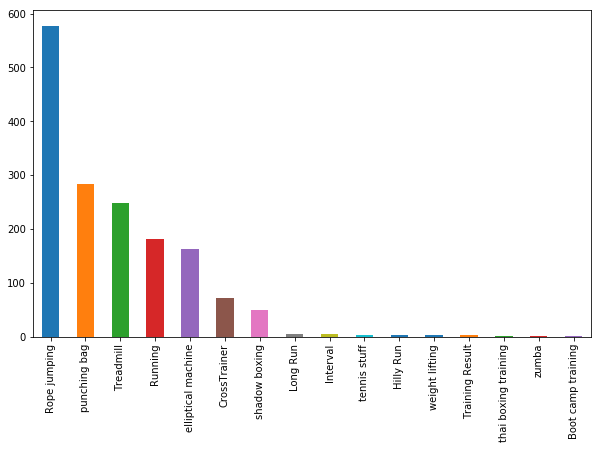

In [6]:
df['sport'].value_counts().plot.bar(figsize=(10, 6));

Let's check which other rows are useless by checking empty values:

In [7]:
df.isna().sum()

created              0
time                 0
sport               27
duration            34
calories            36
distance           996
heart-rate_ave      14
heart-rate_max      25
weight              11
note              1513
dtype: int64

If the 'sport' row is missing, what else is missing:

In [8]:
df[df['sport'].isna()]

,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note
72,2010-08-31 22:18:29.0,2010-08-30 21:14:00.0,None,None,None,None,150,166,75.0,None
82,2010-09-19 00:01:35.0,2010-09-18 11:30:00.0,None,None,None,None,150,172,75.0,None
282,2012-01-05 19:34:34.0,2012-01-05 10:15:00.0,None,None,None,None,150,172,76.0,None
311,2012-02-19 00:35:55.0,2012-02-18 16:00:00.0,None,None,None,None,154,166,76.0,None
313,2012-02-20 17:33:45.0,2012-02-20 09:35:00.0,None,None,None,None,152,161,76.0,None
324,2012-03-06 23:41:58.0,2012-03-06 09:35:00.0,None,None,None,None,149,168,76.0,None
329,2012-03-19 16:08:01.0,2012-03-19 09:15:00.0,None,None,None,None,144,157,76.0,None
385,2012-07-06 23:53:11.0,2012-07-06 14:00:00.0,None,None,None,None,131,160,76.0,None
440,2012-10-28 19:48:29.0,2012-10-28 12:30:00.0,None,None,None,None,157,173,76.0,None
490,2013-02-09 01:55:59.0,2013-02-08 15:00:00.0,None,None,None,None,158,172,76.0,None


the rows above are useless, so let's drop them:

In [9]:
df.drop(df[df['sport'].isna()].index,inplace=True)
#check that missing data was removed
df['sport'].isna().sum()

0

In [10]:
#checking the data types
df.dtypes

created           object
time              object
sport             object
duration          object
calories          object
distance          object
heart-rate_ave    object
heart-rate_max    object
weight            object
note              object
dtype: object

I need to convert the data to the appropriate types in order to be able to work with the data: 

In [11]:
df['created']=df['created'].astype('M')
df['time']=df['time'].astype('M')
#df['duration']=pd.to_timedelta(df['duration'])
df['calories']=df['calories'].astype('float64')
df['distance']=df['distance'].astype('float64')
df['heart-rate_ave']=df['heart-rate_ave'].astype('float64')
df['heart-rate_max']=df['heart-rate_max'].astype('float64')
df['weight']=df['weight'].astype('float64')    

In [12]:
#checking dtypes again
df.dtypes

created           datetime64[ns]
time              datetime64[ns]
sport                     object
duration                  object
calories                 float64
distance                 float64
heart-rate_ave           float64
heart-rate_max           float64
weight                   float64
note                      object
dtype: object

As seen above the column *weight* is in kilos and I understand pounds, so I will change that:

In [13]:
#check if weight is always in kilos
sum(df['weight']<100)+df['weight'].isna().sum() -len(df)

0

In [14]:
df['weight']=df['weight']*2.2046 #kilos to pounds conversion factor

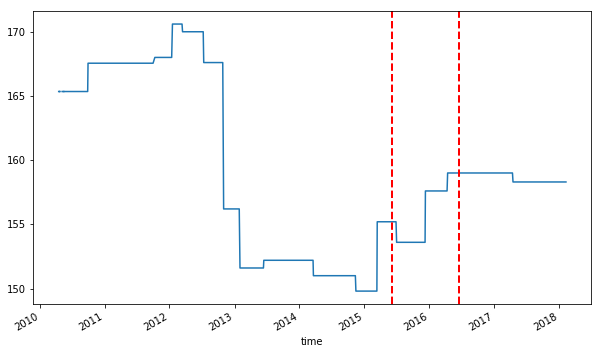

In [15]:
#plotting the weight column
df.set_index('time')['weight'].plot.line(figsize=(10, 6))
plt.axvline(pd.to_datetime('2015-6-8'), color='r', linestyle='--', lw=2)
plt.axvline(pd.to_datetime('2016-6-15'), color='r', linestyle='--', lw=2);

Let's inspect the first ten rows again

In [16]:
df.head(10)

,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note
0,2010-04-18 15:31:20,2010-04-17 19:14:00,elliptical machine,00:32:37,410.0,NaN,149.0,168.0,165.345,None
1,2010-04-18 23:16:00,2010-04-18 17:00:00,elliptical machine,00:34:05,409.0,NaN,137.0,155.0,165.345,None
2,2010-04-21 01:41:59,2010-04-20 21:00:00,elliptical machine,00:33:28,425.0,NaN,152.0,179.0,165.345,None
3,2010-04-18 15:27:13,2010-04-22 18:00:00,Interval,00:45,0.0,NaN,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
4,2010-04-23 01:24:46,2010-04-22 21:00:00,elliptical machine,00:33:52,420.0,NaN,152.0,172.0,165.345,None
5,2010-04-25 13:30:48,2010-04-24 17:00:00,elliptical machine,00:32:13,415.0,6000.0,138.0,161.0,165.345,None
6,2010-04-25 22:53:34,2010-04-25 11:30:00,elliptical machine,00:32:25,412.0,NaN,150.0,166.0,165.345,None
7,2010-04-18 15:27:13,2010-04-25 18:00:00,Long Run,01:00,0.0,NaN,NaN,NaN,NaN,"Distance 9,2 km / 5,8 mi. Sport zones 1-2 (50-..."
8,2010-04-18 15:27:13,2010-04-27 18:00:00,Hilly Run,00:45,0.0,NaN,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
9,2010-04-28 01:53:31,2010-04-27 21:45:00,elliptical machine,00:32:31,432.0,NaN,148.0,175.0,165.345,None


There is some missing *distance* information which appears in the comments of some rows. I will extract that and add that to the distance column

In [17]:
#change from meters to km first (see output of df.head() above)
df['distance']=df['distance'].apply(lambda x:round(x/1000,3))

In [18]:
#extract the values matching a pattern to a temporary series
#otherwise output zero
tmp=df['note'].apply(lambda x: 
                 x.split(' km')[0].replace('Distance ','').replace(',','.') 
                 if (isinstance(x, str) and x.find('Distance')>-1) else 0)
#there is still on special case where the string 'Distance' appears but not in the pattern
tmp[340]=0
tmp=tmp.astype('float64')
sum(tmp>0)

11

In [19]:
#replace missing values with values in temporary series
df.loc[tmp[tmp>0].index,'distance']=tmp[tmp>0]

In [20]:
#check that extraction was successful
df[tmp>0]

,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note
3,2010-04-18 15:27:13,2010-04-22 18:00:00,Interval,00:45,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
7,2010-04-18 15:27:13,2010-04-25 18:00:00,Long Run,01:00,0.0,9.2,NaN,NaN,NaN,"Distance 9,2 km / 5,8 mi. Sport zones 1-2 (50-..."
8,2010-04-18 15:27:13,2010-04-27 18:00:00,Hilly Run,00:45,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
10,2010-04-18 15:27:13,2010-04-29 18:00:00,Interval,00:45,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
12,2010-04-18 15:27:13,2010-05-02 18:00:00,Long Run,01:00,0.0,9.2,NaN,NaN,NaN,"Distance 9,2 km / 5,8 mi. Sport zones 1-2 (50-..."
14,2010-04-18 15:27:13,2010-05-04 18:00:00,Hilly Run,00:45,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
16,2010-04-18 15:27:13,2010-05-06 18:00:00,Interval,00:45,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
19,2010-04-18 15:27:13,2010-05-09 18:00:00,Long Run,01:10,0.0,10.8,NaN,NaN,NaN,"Distance 10,8 km / 6,8 mi. Sport zones 1-2 (50..."
20,2010-04-18 15:27:13,2010-05-11 18:00:00,Hilly Run,00:30,0.0,4.6,NaN,NaN,NaN,"Distance 4,6 km / 2,9 mi. Sport zones 1-3 (50-..."
21,2010-04-18 15:27:13,2010-05-13 18:00:00,Interval,00:40,0.0,6.2,NaN,NaN,NaN,"Distance 6,2 km / 3,9 mi. Sport zones 1-3 (50-..."


In [21]:
#check head of the dataframe again
df.head(10)

,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note
0,2010-04-18 15:31:20,2010-04-17 19:14:00,elliptical machine,00:32:37,410.0,NaN,149.0,168.0,165.345,None
1,2010-04-18 23:16:00,2010-04-18 17:00:00,elliptical machine,00:34:05,409.0,NaN,137.0,155.0,165.345,None
2,2010-04-21 01:41:59,2010-04-20 21:00:00,elliptical machine,00:33:28,425.0,NaN,152.0,179.0,165.345,None
3,2010-04-18 15:27:13,2010-04-22 18:00:00,Interval,00:45,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
4,2010-04-23 01:24:46,2010-04-22 21:00:00,elliptical machine,00:33:52,420.0,NaN,152.0,172.0,165.345,None
5,2010-04-25 13:30:48,2010-04-24 17:00:00,elliptical machine,00:32:13,415.0,6.0,138.0,161.0,165.345,None
6,2010-04-25 22:53:34,2010-04-25 11:30:00,elliptical machine,00:32:25,412.0,NaN,150.0,166.0,165.345,None
7,2010-04-18 15:27:13,2010-04-25 18:00:00,Long Run,01:00,0.0,9.2,NaN,NaN,NaN,"Distance 9,2 km / 5,8 mi. Sport zones 1-2 (50-..."
8,2010-04-18 15:27:13,2010-04-27 18:00:00,Hilly Run,00:45,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
9,2010-04-28 01:53:31,2010-04-27 21:45:00,elliptical machine,00:32:31,432.0,NaN,148.0,175.0,165.345,None


There is no 'speed' column, so it has to be calculated from the 'distance' and 'duration' rows. I will also make the 'duration' data uniform:

In [22]:
def getSpeed(x,t):
    if isinstance(t, str):
        if len(t) == 5:
            tmp = datetime.strptime(t,"%M:%S")#string parsing method
            if tmp.minute < 2:#not minutes, but hours
                tmp = datetime.strptime(t,"%H:%M")
        else:
            tmp = datetime.strptime(t,"%H:%M:%S")
        tot=tmp.hour+tmp.minute/60 +tmp.second/3600 #hours and fractions of hours
        return round((0.6214*x)/(tot),2) #miles per hour
    else:
         return None        
        
def makeUniform(t):
    if isinstance(t, str):
        if len(t) == 5:
            tmp = datetime.strptime(t,"%M:%S")#string parsing method
            if tmp.minute < 2:#not minutes, but hours
                tmp = datetime.strptime(t,"%H:%M")
        else:
            tmp = datetime.strptime(t,"%H:%M:%S")
        return timedelta(hours=tmp.hour, minutes=tmp.minute, seconds=tmp.second)
    else:
         return None

In [23]:
#vectorized version is about 4 times faster than a for loop
df['speed']=np.vectorize(getSpeed)(df['distance'], df['duration'])

#now make durations uniform (found doing this afterwards easier)
df['duration']=df['duration'].apply(lambda x:makeUniform(x))
#check head of the dataframe again
df.head(10)

,created,time,sport,duration,calories,distance,heart-rate_ave,heart-rate_max,weight,note,speed
0,2010-04-18 15:31:20,2010-04-17 19:14:00,elliptical machine,00:32:37,410.0,NaN,149.0,168.0,165.345,None,NaN
1,2010-04-18 23:16:00,2010-04-18 17:00:00,elliptical machine,00:34:05,409.0,NaN,137.0,155.0,165.345,None,NaN
2,2010-04-21 01:41:59,2010-04-20 21:00:00,elliptical machine,00:33:28,425.0,NaN,152.0,179.0,165.345,None,NaN
3,2010-04-18 15:27:13,2010-04-22 18:00:00,Interval,00:45:00,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-...",5.72
4,2010-04-23 01:24:46,2010-04-22 21:00:00,elliptical machine,00:33:52,420.0,NaN,152.0,172.0,165.345,None,NaN
5,2010-04-25 13:30:48,2010-04-24 17:00:00,elliptical machine,00:32:13,415.0,6.0,138.0,161.0,165.345,None,6.94
6,2010-04-25 22:53:34,2010-04-25 11:30:00,elliptical machine,00:32:25,412.0,NaN,150.0,166.0,165.345,None,NaN
7,2010-04-18 15:27:13,2010-04-25 18:00:00,Long Run,01:00:00,0.0,9.2,NaN,NaN,NaN,"Distance 9,2 km / 5,8 mi. Sport zones 1-2 (50-...",5.72
8,2010-04-18 15:27:13,2010-04-27 18:00:00,Hilly Run,00:45:00,0.0,6.9,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-...",5.72
9,2010-04-28 01:53:31,2010-04-27 21:45:00,elliptical machine,00:32:31,432.0,NaN,148.0,175.0,165.345,None,NaN


I want to move the *speed* column after the *distance* one

In [24]:
col_list = list(df)
col_list

['created',
 'time',
 'sport',
 'duration',
 'calories',
 'distance',
 'heart-rate_ave',
 'heart-rate_max',
 'weight',
 'note',
 'speed']

In [25]:
columnsTitles=['created',
 'time',
 'sport',
 'duration',
 'calories',
 'distance',
 'speed',              
 'heart-rate_ave',
 'heart-rate_max',
 'weight',
 'note']
df=df.reindex(columns=columnsTitles)
df.head(20)

,created,time,sport,duration,calories,distance,speed,heart-rate_ave,heart-rate_max,weight,note
0,2010-04-18 15:31:20,2010-04-17 19:14:00,elliptical machine,00:32:37,410.0,NaN,NaN,149.0,168.0,165.345,None
1,2010-04-18 23:16:00,2010-04-18 17:00:00,elliptical machine,00:34:05,409.0,NaN,NaN,137.0,155.0,165.345,None
2,2010-04-21 01:41:59,2010-04-20 21:00:00,elliptical machine,00:33:28,425.0,NaN,NaN,152.0,179.0,165.345,None
3,2010-04-18 15:27:13,2010-04-22 18:00:00,Interval,00:45:00,0.0,6.90,5.72,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
4,2010-04-23 01:24:46,2010-04-22 21:00:00,elliptical machine,00:33:52,420.0,NaN,NaN,152.0,172.0,165.345,None
5,2010-04-25 13:30:48,2010-04-24 17:00:00,elliptical machine,00:32:13,415.0,6.00,6.94,138.0,161.0,165.345,None
6,2010-04-25 22:53:34,2010-04-25 11:30:00,elliptical machine,00:32:25,412.0,NaN,NaN,150.0,166.0,165.345,None
7,2010-04-18 15:27:13,2010-04-25 18:00:00,Long Run,01:00:00,0.0,9.20,5.72,NaN,NaN,NaN,"Distance 9,2 km / 5,8 mi. Sport zones 1-2 (50-..."
8,2010-04-18 15:27:13,2010-04-27 18:00:00,Hilly Run,00:45:00,0.0,6.90,5.72,NaN,NaN,NaN,"Distance 6,9 km / 4,3 mi. Sport zones 1-3 (50-..."
9,2010-04-28 01:53:31,2010-04-27 21:45:00,elliptical machine,00:32:31,432.0,NaN,NaN,148.0,175.0,165.345,None


Now that I have a speed column I can compare running data outside (`Running`) and inside (`Treadmill`)

In [28]:
sports=df.groupby('sport')

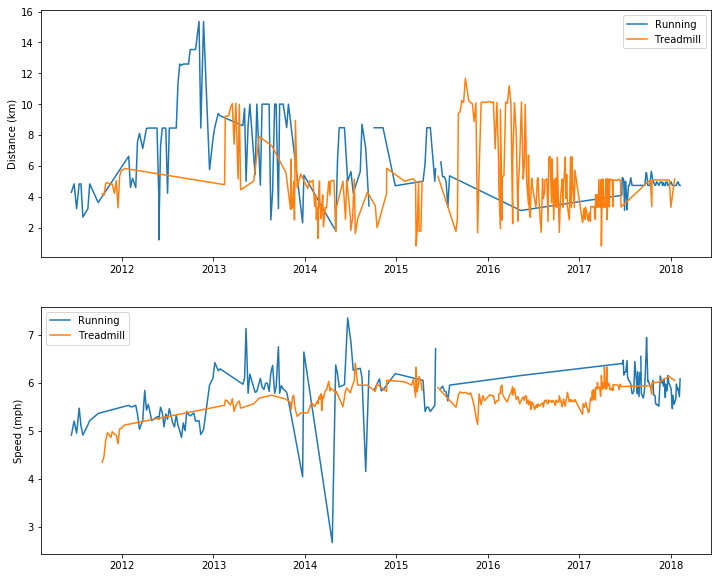

In [30]:
#comparing outside and inside running 
run=sports.get_group('Running')
indoors=sports.get_group('Treadmill')

plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.plot(run['time'],run['distance'], label='Running')
plt.plot(indoors['time'],indoors['distance'], label='Treadmill')
plt.ylabel('Distance (km)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(run['time'],run['speed'], label='Running')
plt.plot(indoors['time'],indoors['speed'], label='Treadmill')
plt.ylabel('Speed (mph)')
plt.legend()

plt.show()

Making a plot of calories consumed per week

In [31]:
#for counting calories per week
def weekCount(df,col,tcol='time'):
    week=pd.DataFrame(columns=['Date','value'])
    low=datetime(2010,4,18)#starting first sunday of database
    high=low+ timedelta(days=7)
    last=df.iloc[-1,1] #time column of last row
    i=0
    while high <= last:
        value=df[(low<=df[tcol]) & (df[tcol]< high)][col].sum()
        week.loc[i]=[low,value]
        low=high
        high=low+ timedelta(days=7)
        i +=1
    return week.set_index('Date')['value']

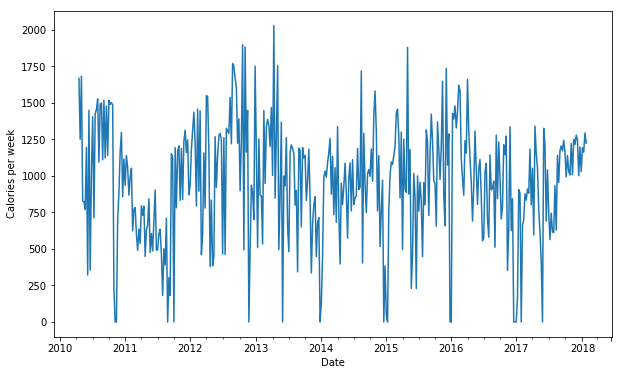

In [32]:
calPerWeek=weekCount(df,'calories')
fig =calPerWeek.plot.line(figsize=(10, 6))
fig.set_ylabel("Calories per week");

storing the dataframe to a csv file:

In [33]:
df.to_csv('polarData.csv', index=False)